In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import rasterio

from gridfinder._util import save_raster

from grid

In [9]:
folder = Path.home() / 'Documents/GIS/VIIRS_Uganda_2016_monthly'

affine = None
arrs = []
for file in os.listdir(folder):
    if file.endswith('.tif'):
        ntl_rd = rasterio.open(os.path.join(folder, file))
        arrs.append(ntl_rd.read(1))
        
        if not affine:
            affine = ntl_rd.transform

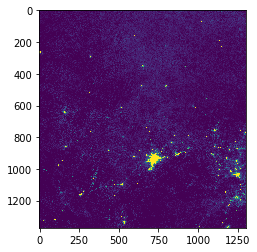

In [43]:
plt.imshow(arrs[6], vmin=0, vmax=1)

In [37]:
a = np.array(arrs)
a.shape

(12, 1372, 1303)

In [38]:
n70 = np.nanpercentile(a, 70, axis=0)
n70

array([[ 0.077,  0.058,  0.044, ...,  0.024,  0.015,  0.03 ],
       [ 0.084,  0.037,  0.051, ..., -0.01 ,  0.041,  0.064],
       [ 0.031,  0.067,  0.06 , ...,  0.037,  0.071,  0.084],
       ...,
       [ 0.045,  0.056,  0.055, ...,  0.05 ,  0.027,  0.057],
       [ 0.044,  0.03 ,  0.024, ...,  0.044,  0.01 ,  0.02 ],
       [ 0.098,  0.017,  0.01 , ...,  0.044,  0.047,  0.05 ]])

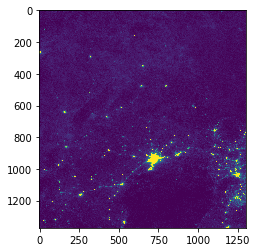

In [39]:
plt.imshow(n70, vmin=0, vmax=1)

In [45]:
n70_out = folder / 'VIIRS_Uganda_p70.tif'
save_raster(n70_out, n70, affine)